<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INPUTS:" data-toc-modified-id="INPUTS:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INPUTS:</a></span></li><li><span><a href="#MOVING-AVERAGES:" data-toc-modified-id="MOVING-AVERAGES:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>MOVING AVERAGES:</a></span></li><li><span><a href="#PORTFOLIO-THEORY:" data-toc-modified-id="PORTFOLIO-THEORY:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PORTFOLIO THEORY:</a></span></li><li><span><a href="#MONTE-CARLO:" data-toc-modified-id="MONTE-CARLO:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>MONTE CARLO:</a></span></li><li><span><a href="#Visualization-and-Analysis:" data-toc-modified-id="Visualization-and-Analysis:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualization and Analysis:</a></span></li></ul></div>

In [12]:
!pip install plotly cufflinks yfinance nsepy yahoofinancials yahoo_fin chart_studio 

  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=abe5ed4cdbc269c834d7c964a921b0fec305cd88e4f432626c172283b8b073a1
  Stored in directory: /home/jovyan/.cache/pip/wheels/b9/2c/cb/d74199e422a1dbc20297d10cfff9c54d03e0b5c6694d49ccdd
Successfully built nsepy


# INPUTS:

In [13]:
    ### Data manipulation
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
        ### Options for pandas
pd.options.display.max_rows    
pd.options.display.max_columns = 50
pd.options.display.max_rows = 999
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
        ### Cufflinks binds Plotly directly to pandas dataframes.
import cufflinks as cf
cf.go_offline(connected=True)
    ### Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
        ### More Visualizations
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)
        ### More Visualizations
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import scipy.optimize as sco
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
    ### IMPORT API FUNCTIONS
import yfinance as yf
from yahoofinancials import YahooFinancials
from yahoo_fin.stock_info import get_analysts_info
from yahoo_fin.stock_info import *
import requests
import requests_html
    ### MISC LIB IMPORTS
from functools import reduce
import locale
from datetime import date, datetime, timedelta
from nsepy import get_history
from urllib.request import urlopen
import os
import time
import csv
import json
import requests
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')

# MOVING AVERAGES:

In [14]:
def ST_Trading_signals(ticker):
    df = pdr.get_data_yahoo(ticker, start=start, end=end)
    
    df_daily_close = df[['Adj Close']]
    df_daily_pct_c = df_daily_close.pct_change()
    df_daily_pct_c.fillna(0, inplace=True)
    
    df_daily_pct_c = df_daily_close / df_daily_close.shift(1) - 1
    df['Daily_S_RoR'] = df_daily_pct_c['Adj Close']
    
    # LOG Rate Of Return
    df_daily_log_returns = np.log(df_daily_close.pct_change()+1)
    df_daily_log_returns.head()
    df['Daily_Log'] = df_daily_log_returns['Adj Close']
    
    # Total Return
    df_cum_daily_return = (1 + df_daily_pct_c).cumprod()
    df['Total_RoR'] = df_cum_daily_return['Adj Close']
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    
#     short_window = 13
#     long_window = 25
#     signals = pd.DataFrame(index=df.index)                   # Initialize the `signals` DataFrame with the `signal` column
#     signals['signal'] = 0.0                                     # Create short simple moving average over the short window
#     signals['short_mavg'] = df['Close'].rolling(window=short_window,min_periods=1,center=False).mean()
#     signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
#     signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]> signals['long_mavg'][short_window:],
#                                                 1.0, 0.0)
#     signals['positions'] = signals['signal'].diff()              # Generate trading orders
#     print('')
#     ############################################################
#     fig = plt.figure(figsize=(15, 11))                                      # Initialize the plot figure
#     ax1 = fig.add_subplot(111,  ylabel='Price in $')                        # Add a subplot and label for y-axis
#     df['Close'].plot(ax=ax1, lw=2.)                                      # Plot the closing price
#     signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)                # Plot the short and long moving averages
#     ax1.plot(signals.loc[signals.positions == 1.0].index, 
#              signals.short_mavg[signals.positions == 1.0],'^', markersize=15, color='k')
#     ax1.plot(signals.loc[signals.positions == -1.0].index,                   # Plot the sell signals
#              signals.short_mavg[signals.positions == -1.0],'v', markersize=15, color='r')
#     ax1.set_title(ticker+' - Moving Average Trade Signals SHORT-TERM')
#     plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#     sns.set(style='darkgrid', context='talk', palette='Dark2')
#     plt.show()
    

def MT_Trading_signals(ticker):
    df = pdr.get_data_yahoo(ticker, start=start, end=end)
    
    df_daily_close = df[['Adj Close']]
    df_daily_pct_c = df_daily_close.pct_change()
    df_daily_pct_c.fillna(0, inplace=True)
    
    df_daily_pct_c = df_daily_close / df_daily_close.shift(1) - 1
    df['Daily_S_RoR'] = df_daily_pct_c['Adj Close']
    
    # LOG Rate Of Return
    df_daily_log_returns = np.log(df_daily_close.pct_change()+1)
    df_daily_log_returns.head()
    df['Daily_Log'] = df_daily_log_returns['Adj Close']
    
    # Total Return
    df_cum_daily_return = (1 + df_daily_pct_c).cumprod()
    df['Total_RoR'] = df_cum_daily_return['Adj Close']
    df.rename(columns={'Adj Close': ticker}, inplace=True)
    
    short_window = 20
    long_window = 50
    signals = pd.DataFrame(index=df.index)                   # Initialize the `signals` DataFrame with the `signal` column
    signals['signal'] = 0.0                                     # Create short simple moving average over the short window
    signals['short_mavg'] = df['Close'].rolling(window=short_window,min_periods=1,center=False).mean()
    signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]> signals['long_mavg'][short_window:],
                                                1.0, 0.0)
    signals['positions'] = signals['signal'].diff()              # Generate trading orders
    print('')
    ############################################################
    fig = plt.figure(figsize=(15, 11))                                      # Initialize the plot figure
    ax1 = fig.add_subplot(111,  ylabel='Price in $')                        # Add a subplot and label for y-axis
    df['Close'].plot(ax=ax1, lw=2.)                                      # Plot the closing price
    signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)                # Plot the short and long moving averages
    ax1.plot(signals.loc[signals.positions == 1.0].index, 
             signals.short_mavg[signals.positions == 1.0],'^', markersize=15, color='k')
    ax1.plot(signals.loc[signals.positions == -1.0].index,                   # Plot the sell signals
             signals.short_mavg[signals.positions == -1.0],'v', markersize=15, color='r')
    ax1.set_title(ticker+' - Moving Average Trade Signals MID-TERM')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.show()
    

# def LT_Trading_signals(ticker):
#     df = pdr.get_data_yahoo(ticker, start=start, end=end)
    
#     df_daily_close = df[['Adj Close']]
#     df_daily_pct_c = df_daily_close.pct_change()
#     df_daily_pct_c.fillna(0, inplace=True)
    
#     df_daily_pct_c = df_daily_close / df_daily_close.shift(1) - 1
#     df['Daily_S_RoR'] = df_daily_pct_c['Adj Close']
    
#     # LOG Rate Of Return
#     df_daily_log_returns = np.log(df_daily_close.pct_change()+1)
#     df_daily_log_returns.head()
#     df['Daily_Log'] = df_daily_log_returns['Adj Close']
    
#     # Total Return
#     df_cum_daily_return = (1 + df_daily_pct_c).cumprod()
#     df['Total_RoR'] = df_cum_daily_return['Adj Close']
#     df.rename(columns={'Adj Close': ticker}, inplace=True)
    
#     short_window = 50
#     long_window = 200
#     signals = pd.DataFrame(index=df.index)                   # Initialize the `signals` DataFrame with the `signal` column
#     signals['signal'] = 0.0                                     # Create short simple moving average over the short window
#     signals['short_mavg'] = df['Close'].rolling(window=short_window,min_periods=1,center=False).mean()
#     signals['long_mavg'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()
#     signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]> signals['long_mavg'][short_window:],
#                                                 1.0, 0.0)
#     signals['positions'] = signals['signal'].diff()              # Generate trading orders
#     print('')
#     ############################################################
#     fig = plt.figure(figsize=(15, 11))                                      # Initialize the plot figure
#     ax1 = fig.add_subplot(111,  ylabel='Price in $')                        # Add a subplot and label for y-axis
#     df['Close'].plot(ax=ax1, lw=2.)                                      # Plot the closing price
#     signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)                # Plot the short and long moving averages
#     ax1.plot(signals.loc[signals.positions == 1.0].index, 
#              signals.short_mavg[signals.positions == 1.0],'^', markersize=15, color='k')
#     ax1.plot(signals.loc[signals.positions == -1.0].index,                   # Plot the sell signals
#              signals.short_mavg[signals.positions == -1.0],'v', markersize=15, color='r')
#     ax1.set_title(ticker+' - Moving Average Trade Signals LONG-TERM')
#     plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
#     sns.set(style='darkgrid', context='talk', palette='Dark2')
#     plt.show()

In [15]:
start = datetime(2019, 6, 12)
end = datetime.now()

# ticker = input('Enter Ticker: ')
tickers = ['BE','TSLA','AAPL','NLS','CLLS','FVRR','NTLA','JMIA','PLUG','SAGE','SAIL','SE','NVDA','MU','ANTM']

In [16]:
### SINGLE TICKER

# ST_Trading_signals(ticker)
# MT_Trading_signals(ticker)
# LT_Trading_signals(ticker)

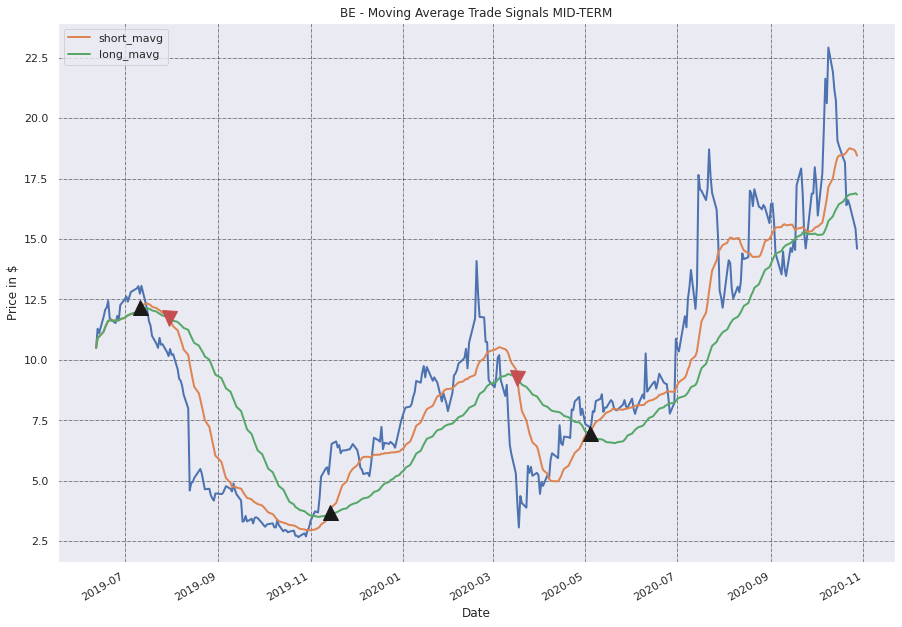

NameError: name 'LT_Trading_signals' is not defined

In [17]:
### TICKERS LIST

for ticker in tickers:
    ST_Trading_signals(ticker)
    MT_Trading_signals(ticker)
    LT_Trading_signals(ticker)

# PORTFOLIO THEORY:

cp: cannot create regular file 'drive/My Drive/runz': No such file or directory


<AxesSubplot:xlabel='Date'>

Text(0.5, 1.0, 'Adjusted Close Price')

Text(0.5, 0, 'Year')

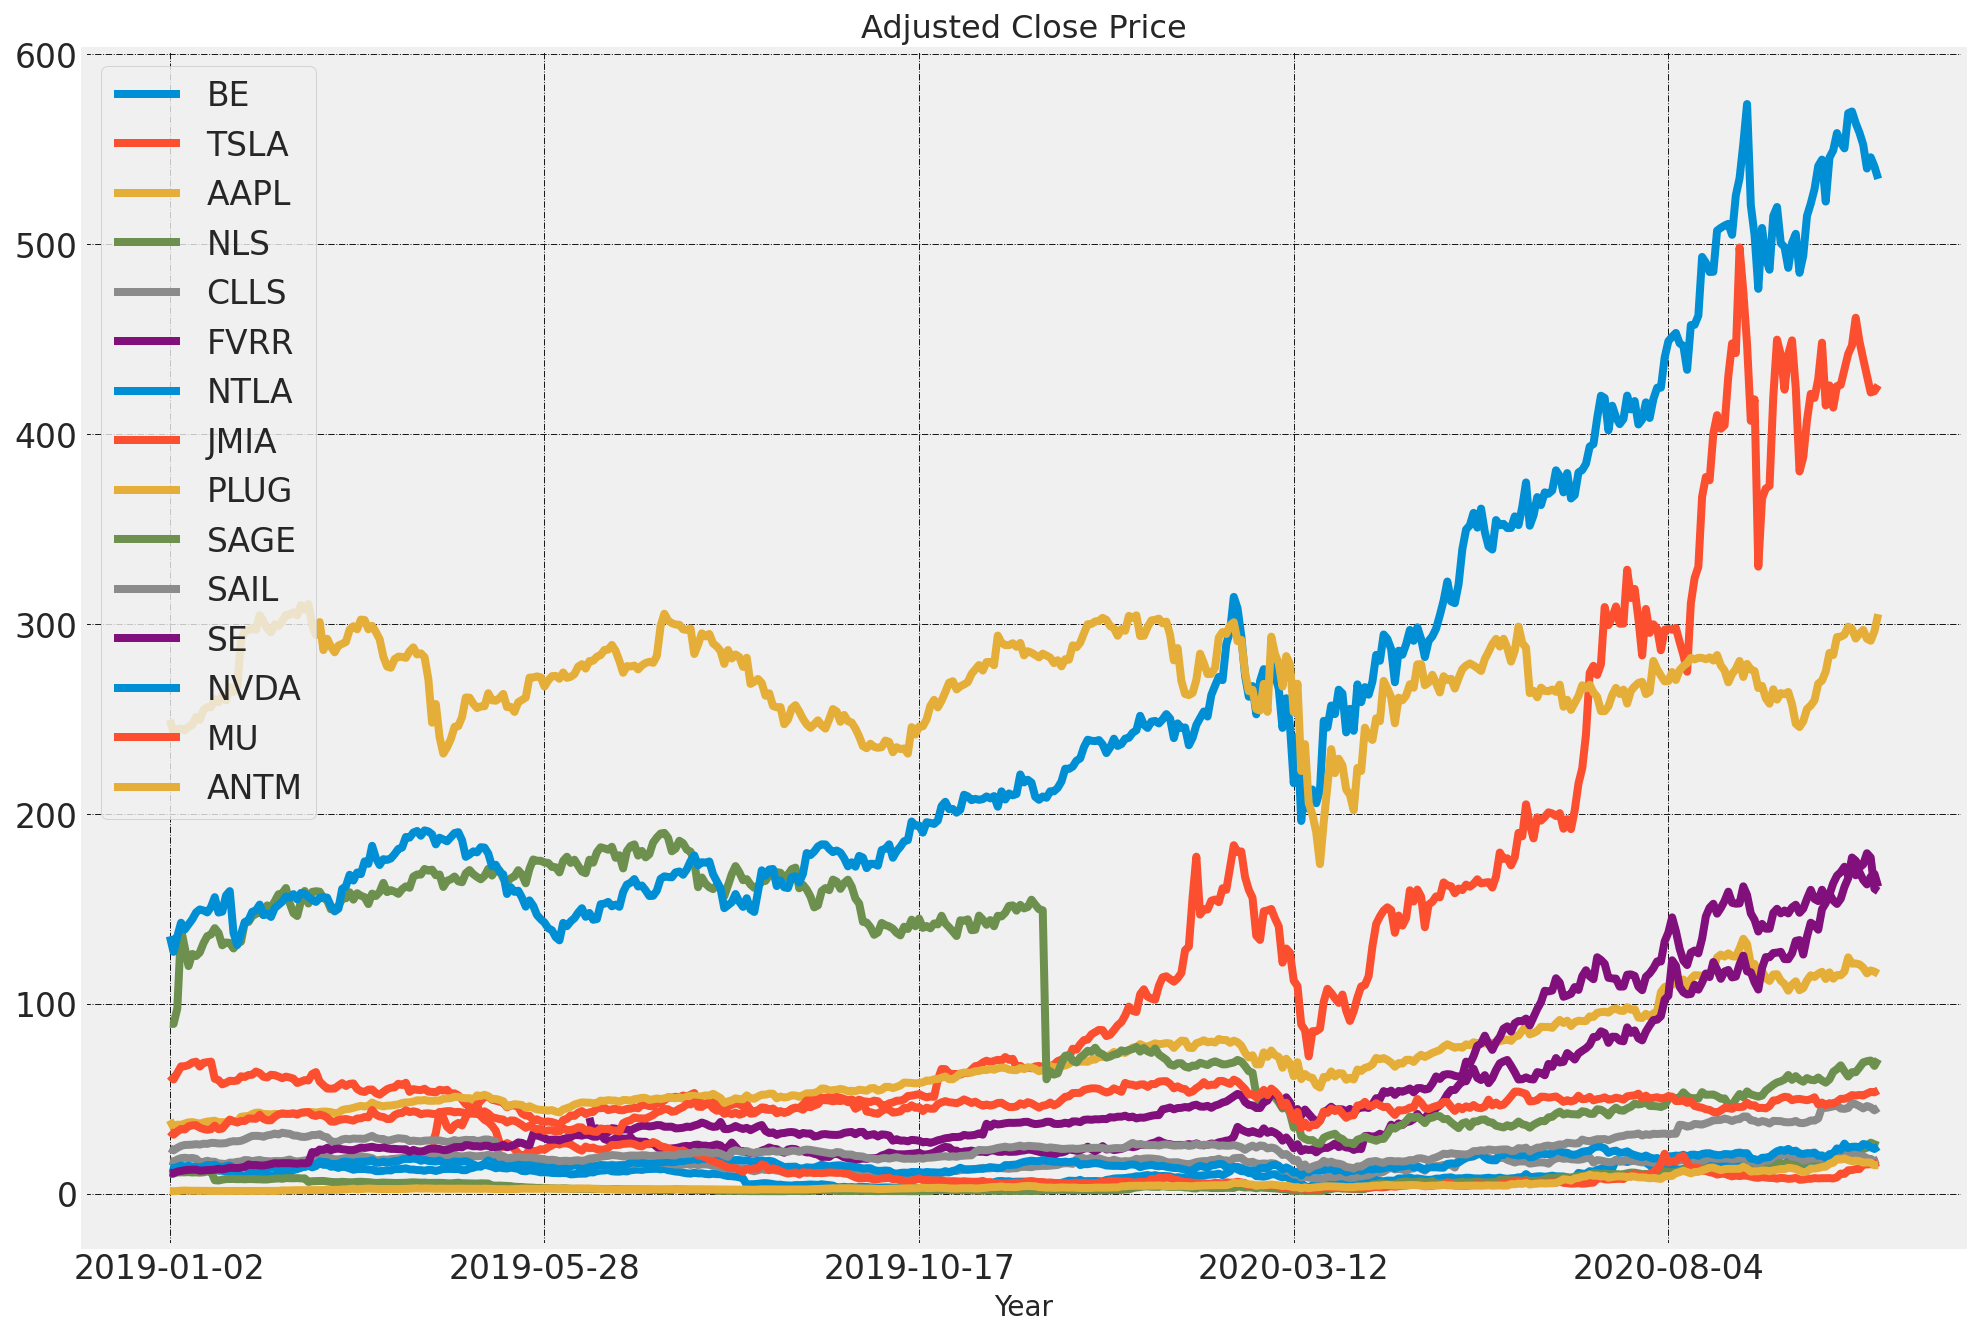

,BE,TSLA,AAPL,NLS,CLLS,FVRR,NTLA,JMIA,PLUG,SAGE,SAIL,SE,NVDA,MU,ANTM
Date,,,,,,,,,,,,,,,
2019-01-02,10.12,62.023998,38.629097,11.19,17.17,NaN,13.70,NaN,1.33,89.449997,23.870001,11.05,135.506561,32.750000,249.479858
2019-01-03,10.47,60.071999,34.781353,10.95,16.65,NaN,13.13,NaN,1.26,89.330002,22.770000,10.72,127.319656,31.000000,243.023224
2019-01-04,11.83,63.537998,36.266144,11.11,17.93,NaN,14.04,NaN,1.34,97.510002,24.049999,11.56,135.476715,32.700001,244.480865
2019-01-07,12.41,66.991997,36.185429,11.19,18.65,NaN,14.70,NaN,1.53,139.130005,25.070000,11.95,142.648941,34.000000,244.911301
2019-01-08,12.73,67.070000,36.875229,11.19,18.85,NaN,14.23,NaN,1.60,129.399994,25.590000,12.30,139.097656,33.740002,244.040665


In [12]:
start_date = '2019-01-01'
end_date = datetime.now()

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# from google.colab import drive
# drive.mount('drive')

Table = wb.DataReader(tickers, 'yahoo', start_date, end_date)['Adj Close']
Table.to_csv('data.csv')
!cp data.csv "drive/My Drive/runz"
#Table.to_csv(r'C:/Users/gordo/OneDrive/CODE/4Data/port/AAA.csv')
# from google.colab import drive
# drive.mount('/content/drive')
# path = "drive/My Drive/runz/data.csv"
# PT_data = pd.read_csv(path)
PT_data=pd.read_csv('data.csv')
PT_data.rename(columns={'Adj Close':tickers}, inplace=True)


PT = PT_data.set_index('Date')
#PT.head()

# Plot all the close prices
PT.plot(figsize=(15, 11))
# Show the legend
plt.legend()
# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)
# Define the labels for x-axis and y-axis
plt.xlabel('Year', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()
PT.head()

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.1
Annualised Volatility: 0.42


              BE   TSLA  AAPL   NLS  CLLS   FVRR  NTLA  JMIA   PLUG  SAGE  \
allocation  0.71  12.55  7.36  5.18  2.22  14.15  3.11  1.47  15.91   5.1   

            SAIL     SE  NVDA    MU   ANTM  
allocation  1.47  15.61  2.63  2.11  10.43  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.68
Annualised Volatility: 0.38


              BE  TSLA   AAPL   NLS  CLLS  FVRR   NTLA  JMIA  PLUG  SAGE  \
allocation  0.98  0.55  15.52  5.14  3.95  1.72  10.73  0.46  4.77  7.75   

             SAIL    SE  NVDA    MU   ANTM  
allocation  18.69  7.52  3.06  4.23  14.92  


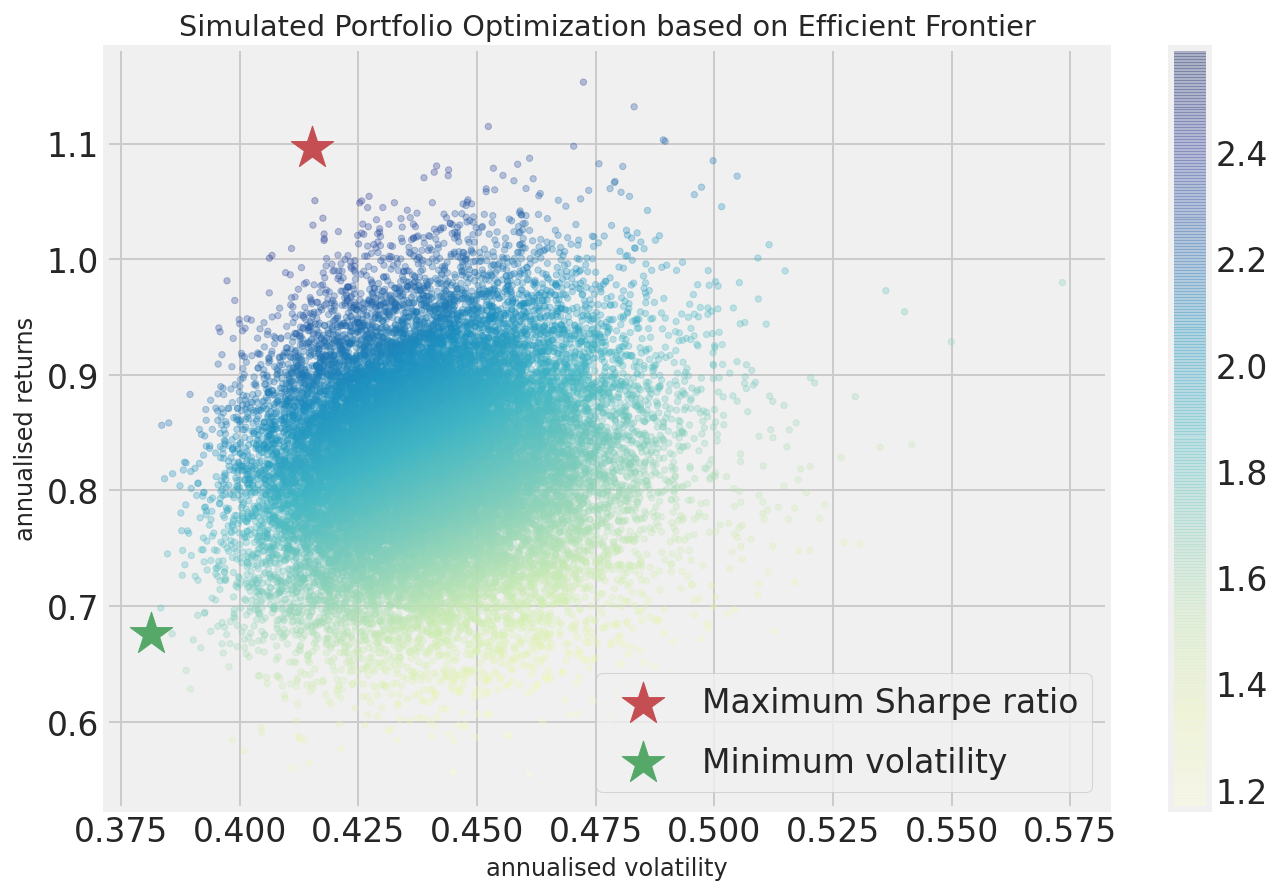

In [13]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights,
                                                                               mean_returns,
                                                                               cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

returns = PT.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=PT.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=PT.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.56
Annualised Volatility: 0.48


             BE   TSLA  AAPL   NLS  CLLS   FVRR  NTLA  JMIA   PLUG  SAGE  \
allocation  0.0  10.84   0.0  3.49   0.0  12.75   0.0   0.0  23.57   0.0   

            SAIL     SE  NVDA   MU  ANTM  
allocation   0.0  49.35   0.0  0.0   0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.61
Annualised Volatility: 0.34


             BE  TSLA   AAPL   NLS  CLLS  FVRR  NTLA  JMIA  PLUG  SAGE  SAIL  \
allocation  0.0   0.0  45.66  2.34  1.17  2.48   0.0   0.0   0.0  3.81  9.98   

              SE  NVDA    MU   ANTM  
allocation  7.18   0.0  0.55  26.83  


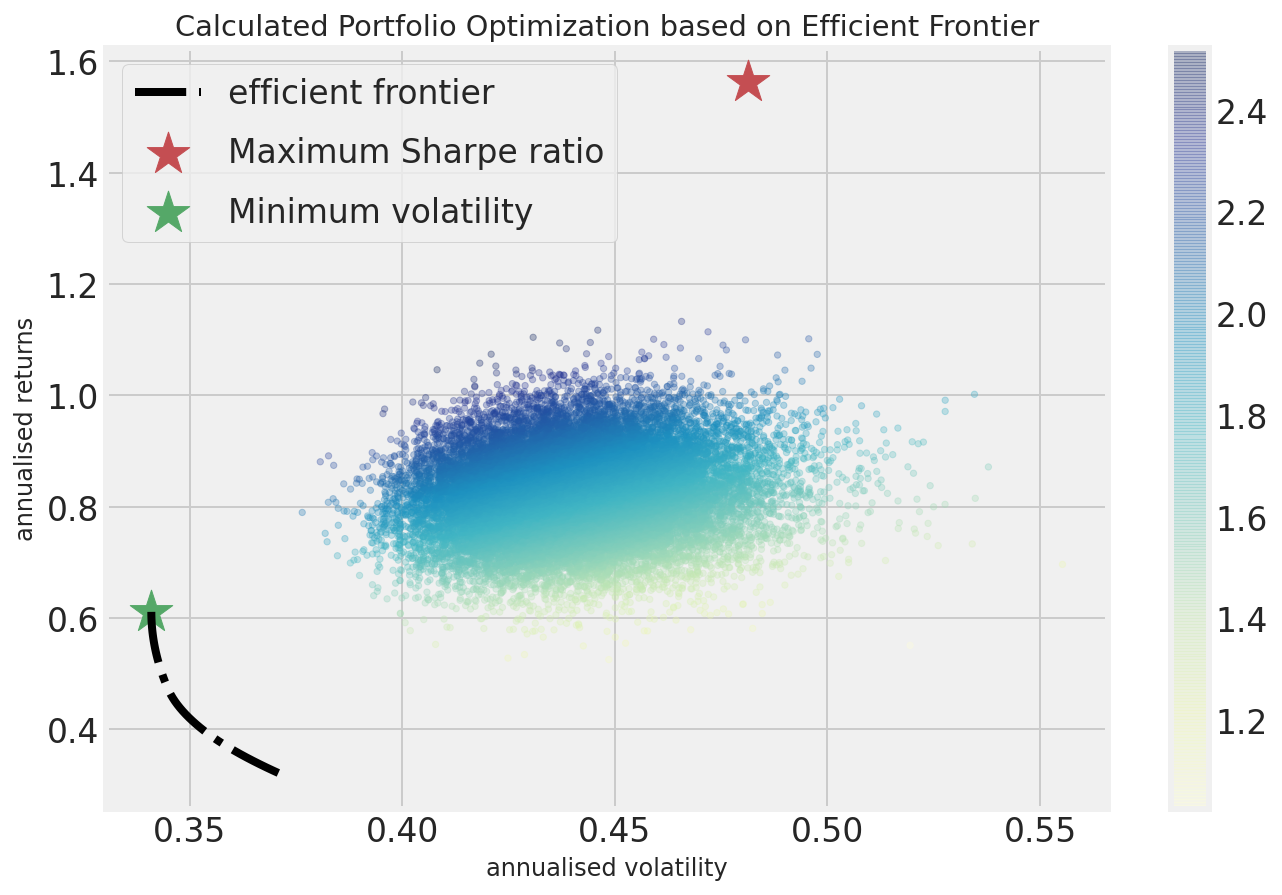

In [14]:
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,],
                          args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=PT.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=PT.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)
    
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 1.56
Annualised Volatility: 0.48


             BE   TSLA  AAPL   NLS  CLLS   FVRR  NTLA  JMIA   PLUG  SAGE  \
allocation  0.0  10.84   0.0  3.49   0.0  12.75   0.0   0.0  23.57   0.0   

            SAIL     SE  NVDA   MU  ANTM  
allocation   0.0  49.35   0.0  0.0   0.0  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.61
Annualised Volatility: 0.34


             BE  TSLA   AAPL   NLS  CLLS  FVRR  NTLA  JMIA  PLUG  SAGE  SAIL  \
allocation  0.0   0.0  45.66  2.34  1.17  2.48   0.0   0.0   0.0  3.81  9.98   

              SE  NVDA    MU   ANTM  
allocation  7.18   0.0  0.55  26.83  
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

BE : annuaised return 0.94 , annualised volatili

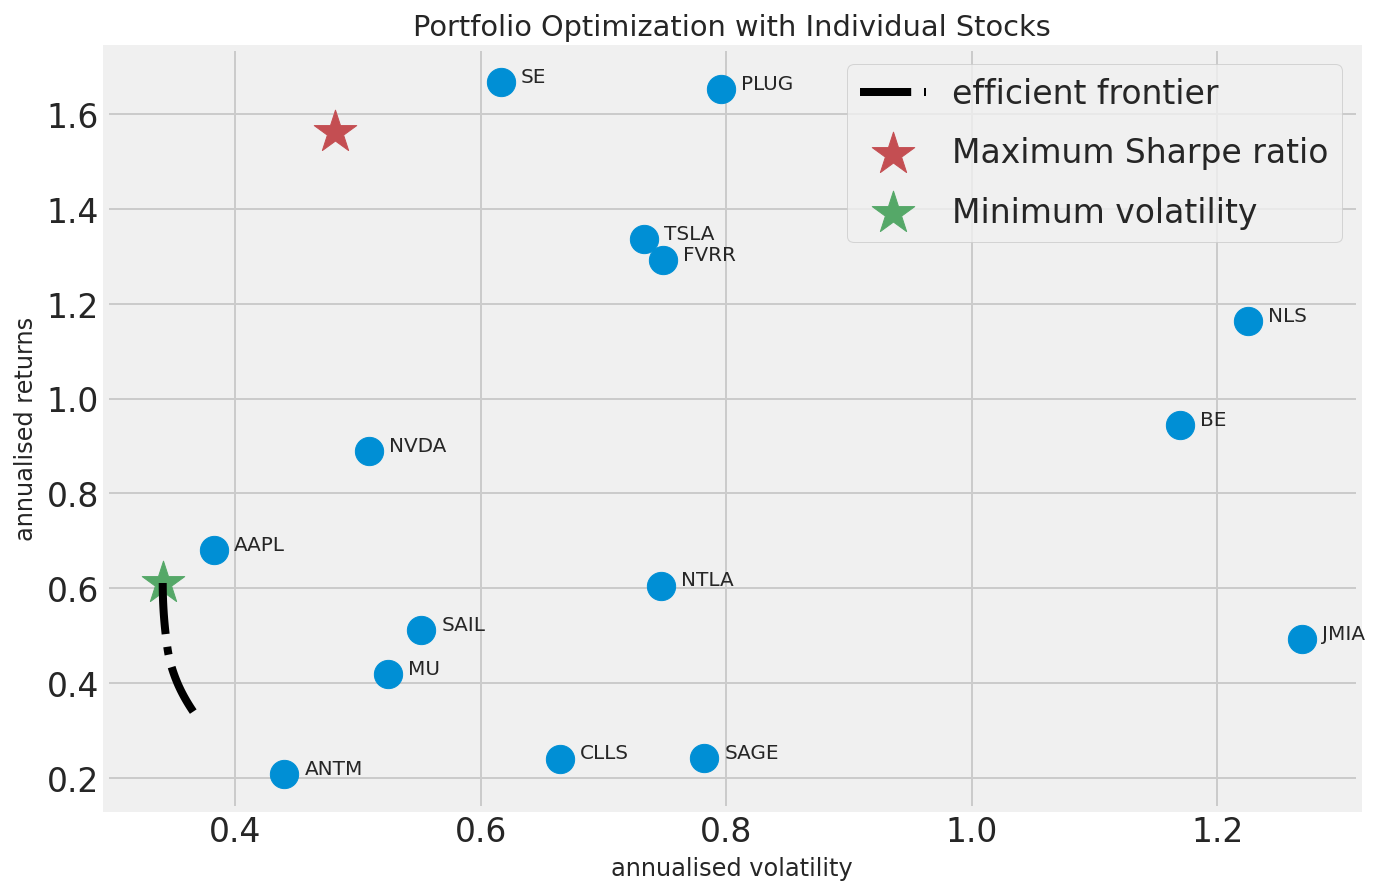

In [15]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'],
                                               mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=PT.columns,
                                         columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=PT.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(PT.columns):
        print (txt,":","annuaised return",round(an_rt[i],2),
               ", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(PT.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), 
                    xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500,
               label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',
               color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.34, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.',
            color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)
    
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

# MONTE CARLO:

Enter Asset: BE
[*********************100%***********************]  1 of 1 completed
Downloaded 375 rows of data.


Text(0.5, 1.0, 'BE returns: 2019-01-01 - 2020-6-29')

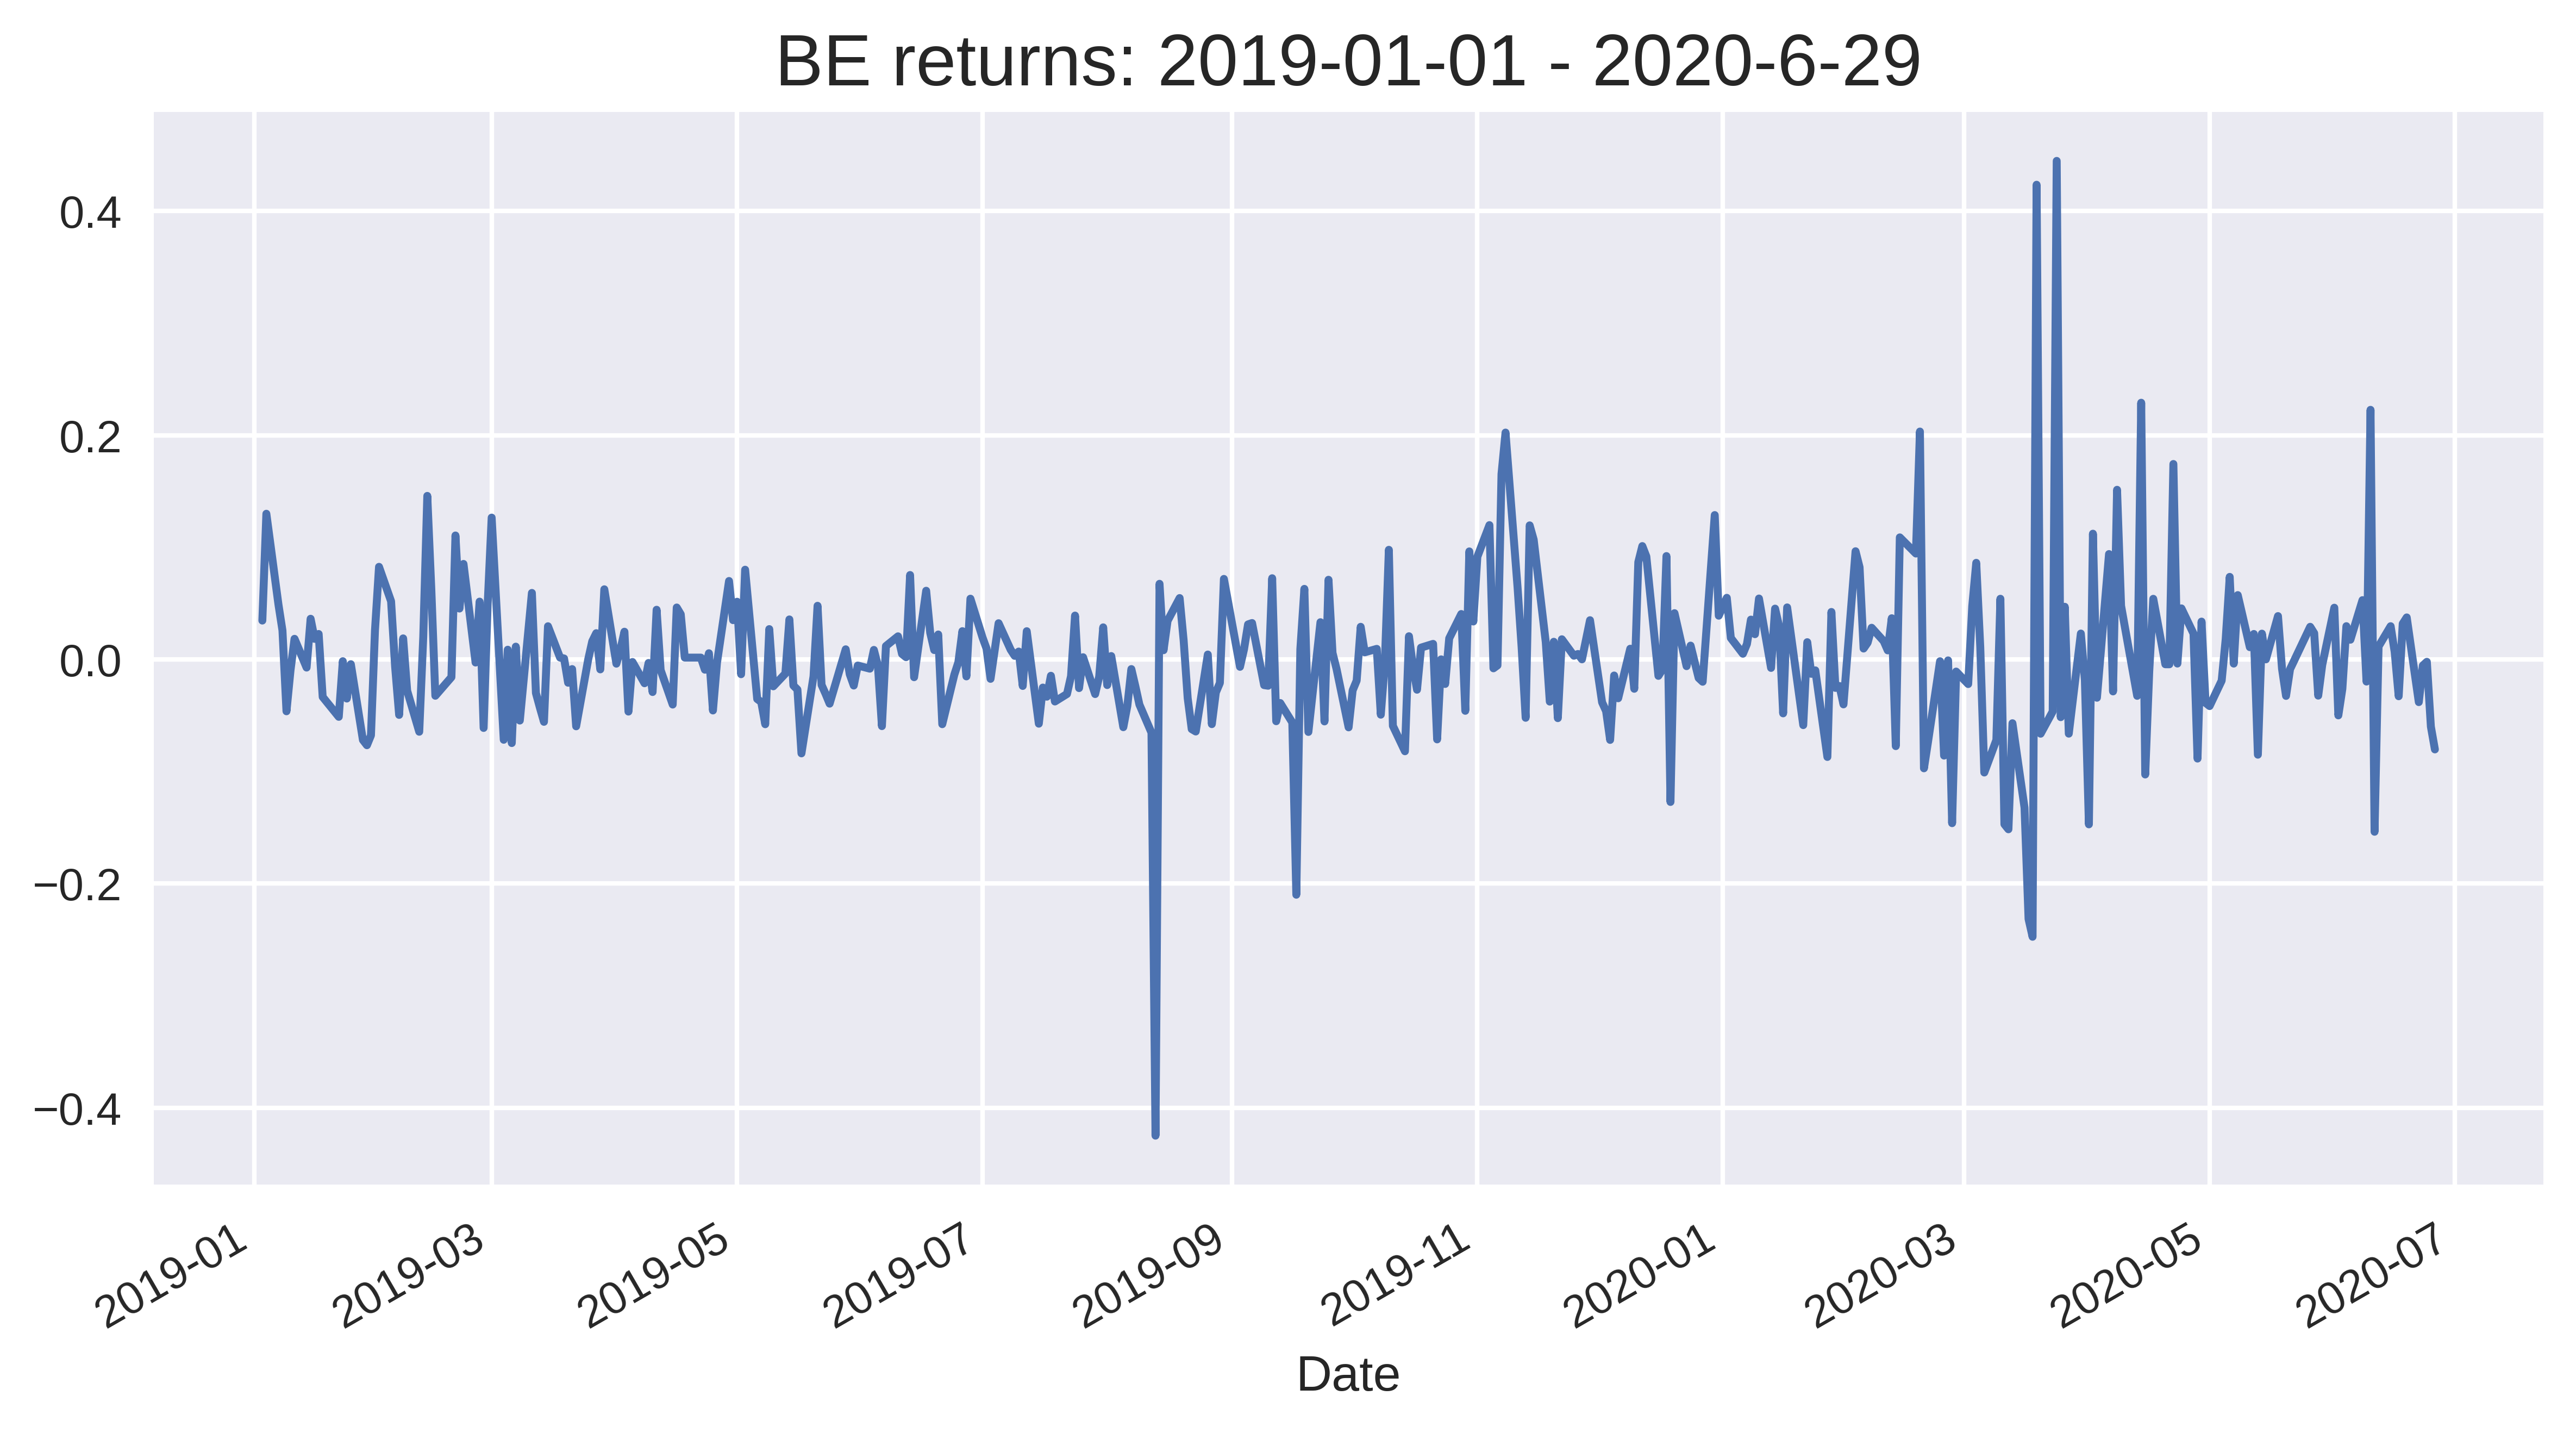

Average return: 0.18%


KeyError: datetime.date(2020, 1, 31)

In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings
plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

### 2. Define parameters for downloading data:
RISKY_ASSET = input('Enter Asset: ')
START_DATE = '2019-01-01'
END_DATE = '2020-6-29'

### 3. Download data from Yahoo Finance:
df = yf.download(RISKY_ASSET, start=START_DATE, 
                 end=END_DATE, adjusted=True)
print(f'Downloaded {df.shape[0]} rows of data.')

### 4. Calculate daily returns:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
ax = returns.plot()
ax.set_title(f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}', 
             fontsize=16)
plt.tight_layout()
#plt.savefig(r'C:/Users/gordon/OneDrive/CODE/4_Data/1_AssetAnalysis/MonteCarloSim.png')
plt.show()

print(f'Average return: {100 * returns.mean():.2f}%')


### 5. Split data into the training and test sets:
train = returns['2019-01-01':'2020-01-31']
test = returns['2020-02-01':'2030-03-20']


### 6. Specify the parameters of the simulation:
T = len(test)
N = len(test)
S_0 = adj_close[train.index[-1].date()]
N_SIM = 100
mu = train.mean()
sigma = train.std()



### 7. Define the function used for simulations:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N, 
                 random_seed=42):
    '''
    Function used for simulating stock returns using Geometric Brownian Motion.
    
    Parameters
    ------------
    s_0 : float
        Initial stock price
    mu : float
        Drift coefficient
    sigma : float
        Diffusion coefficient
    n_sims : int
        Number of simulations paths
    dt : float
        Time increment, most commonly a day
    T : float
        Length of the forecast horizon, same unit as dt
    N : int
        Number of time increments in the forecast horizon
    random_seed : int
        Random seed for reproducibility

    Returns
    -----------
    S_t : np.ndarray
        Matrix (size: n_sims x (T+1)) containing the simulation results. 
        Rows respresent sample paths, while columns point of time.
    '''
    np.random.seed(random_seed)
    
    dt = T/N
    dW = np.random.normal(scale = np.sqrt(dt), size=(n_sims, N))
    W = np.cumsum(dW, axis=1)
    
    time_step = np.linspace(dt, T, N)
    time_steps = np.broadcast_to(time_step, (n_sims, N))
    
    S_t = s_0 * np.exp((mu - 0.5 * sigma**2) * time_steps 
                       + sigma * W)
    S_t = np.insert(S_t, 0, s_0, axis=1)
    
    return S_t


### 8. Run the simulations:
gbm_simulations = simulate_gbm(S_0, mu, sigma, N_SIM, T, N)


### 9. Plot simulation results:
# prepare objects for plotting 
last_train_date = train.index[-1].date()
first_test_date = test.index[0].date()
last_test_date = test.index[-1].date()
plot_title = (f'{RISKY_ASSET} Simulation '
              f'({first_test_date}:{last_test_date})')

selected_indices = adj_close[last_train_date:last_test_date].index
index = [date.date() for date in selected_indices]

gbm_simulations_df = pd.DataFrame(np.transpose(gbm_simulations), 
                                  index=index)

# plotting
ax = gbm_simulations_df.plot(alpha=0.2, legend=False)
line_1, = ax.plot(index, gbm_simulations_df.mean(axis=1), 
                  color='red')
line_2, = ax.plot(index, adj_close[last_train_date:last_test_date], 
                  color='blue')
ax.set_title(plot_title, fontsize=16)
ax.legend((line_1, line_2), ('mean', 'actual'))

plt.tight_layout()
#plt.savefig(r'C:/Users/gordon/OneDrive/CODE/4_Data/1_AssetAnalysis/MonteCarloSim.png')
plt.show()

# Visualization and Analysis:

Ticker: AAPL


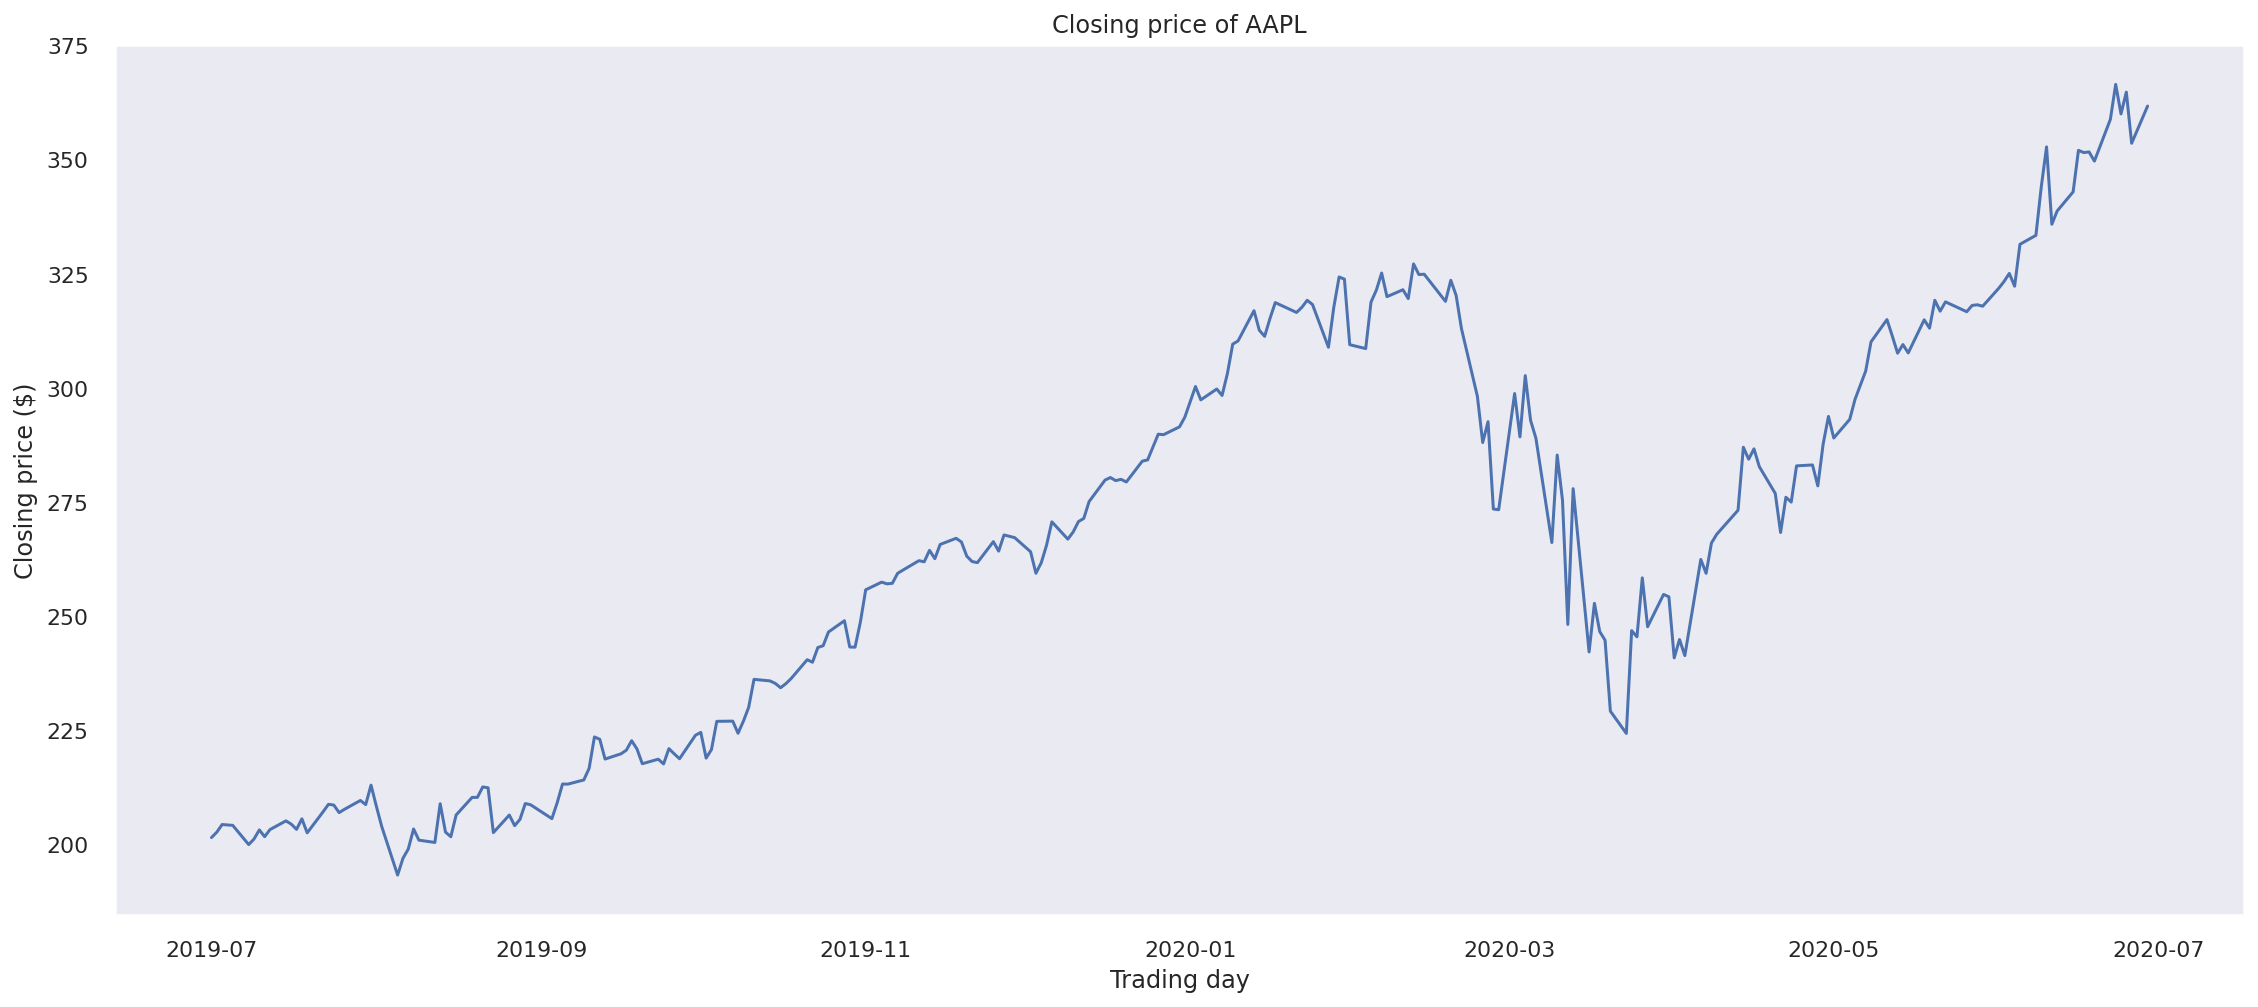

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-06-23,372.380005,362.269989,364.000000,366.529999,53038900.0,366.529999
2020-06-24,368.790009,358.519989,365.000000,360.059998,48155800.0,360.059998
2020-06-25,365.000000,357.570007,360.700012,364.839996,34380600.0,364.839996
2020-06-26,365.320007,353.019989,364.410004,353.630005,51314200.0,353.630005
2020-06-29,362.170013,351.279999,353.250000,361.779999,32661500.0,361.779999


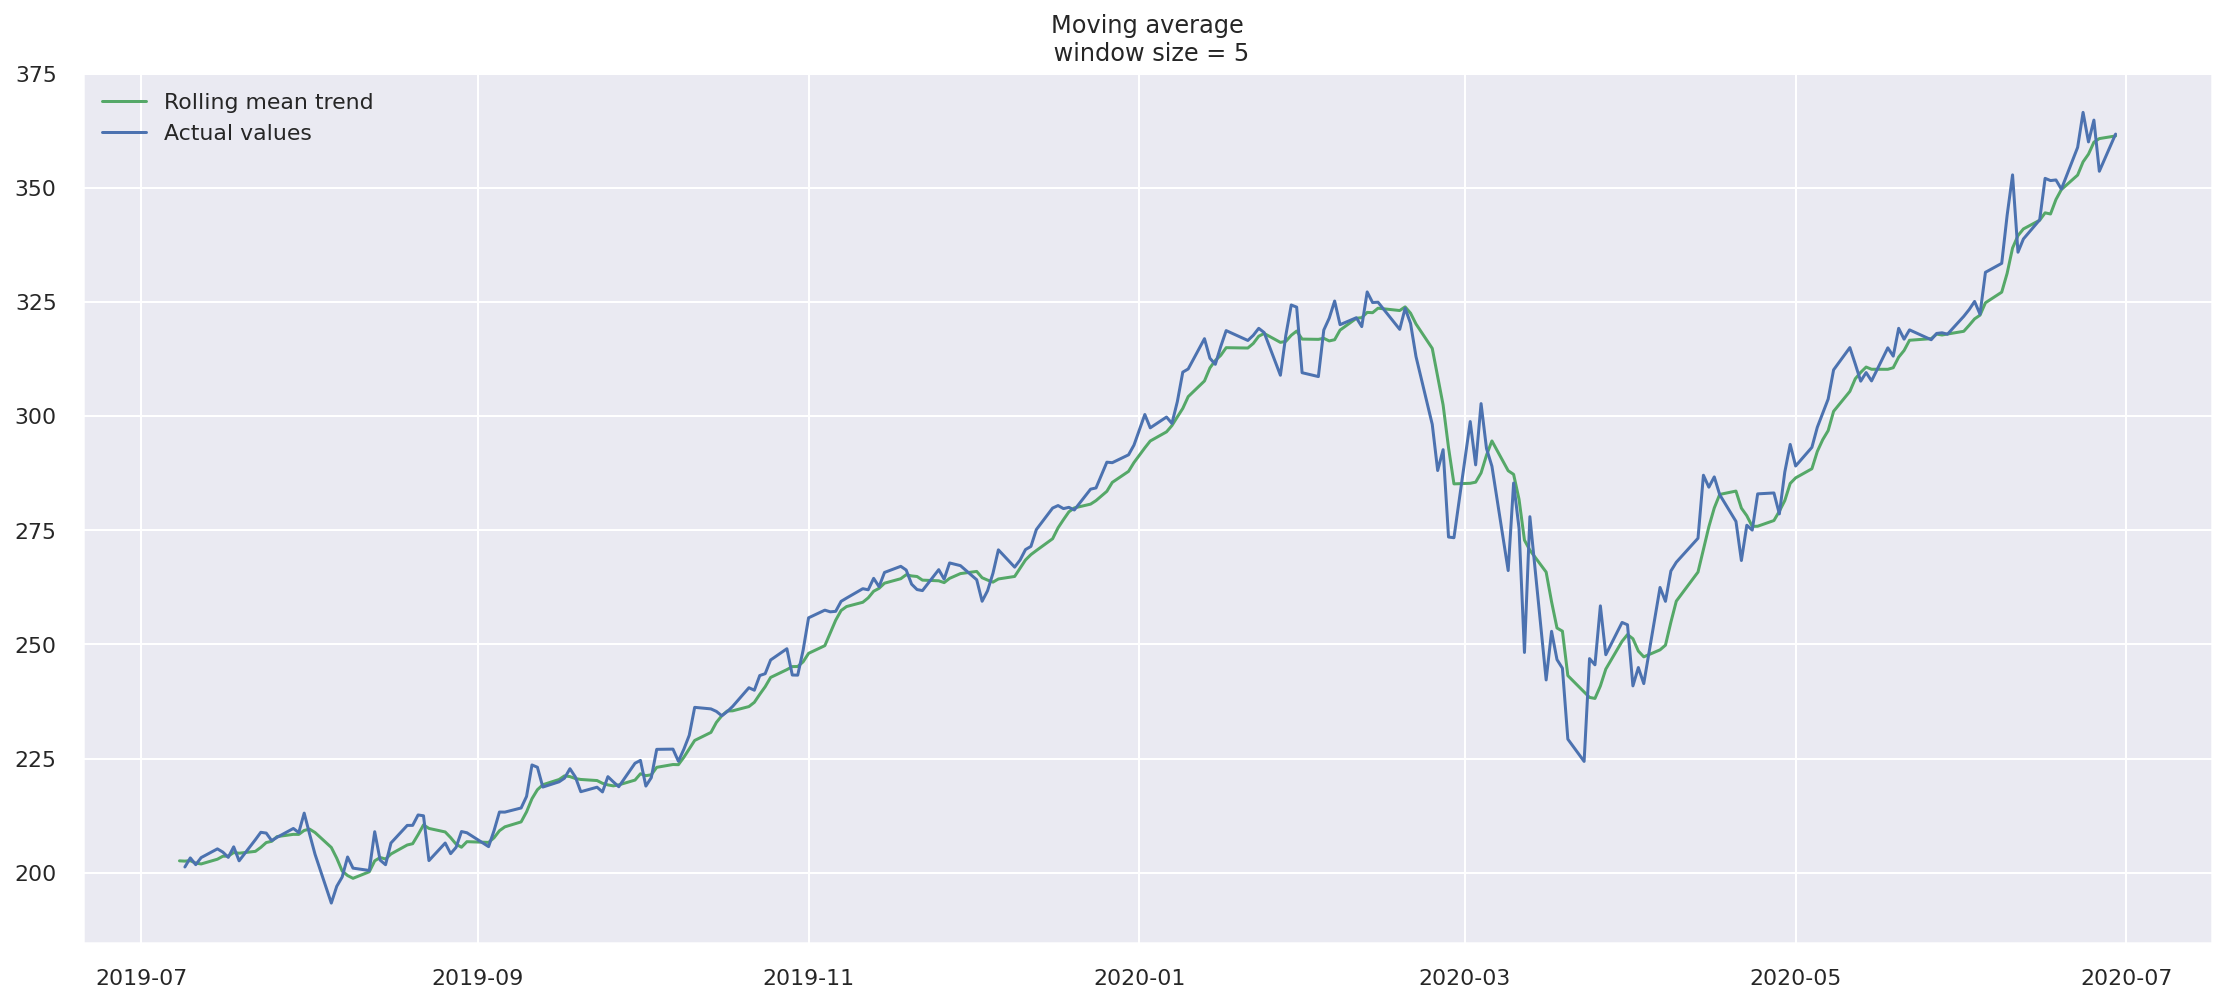

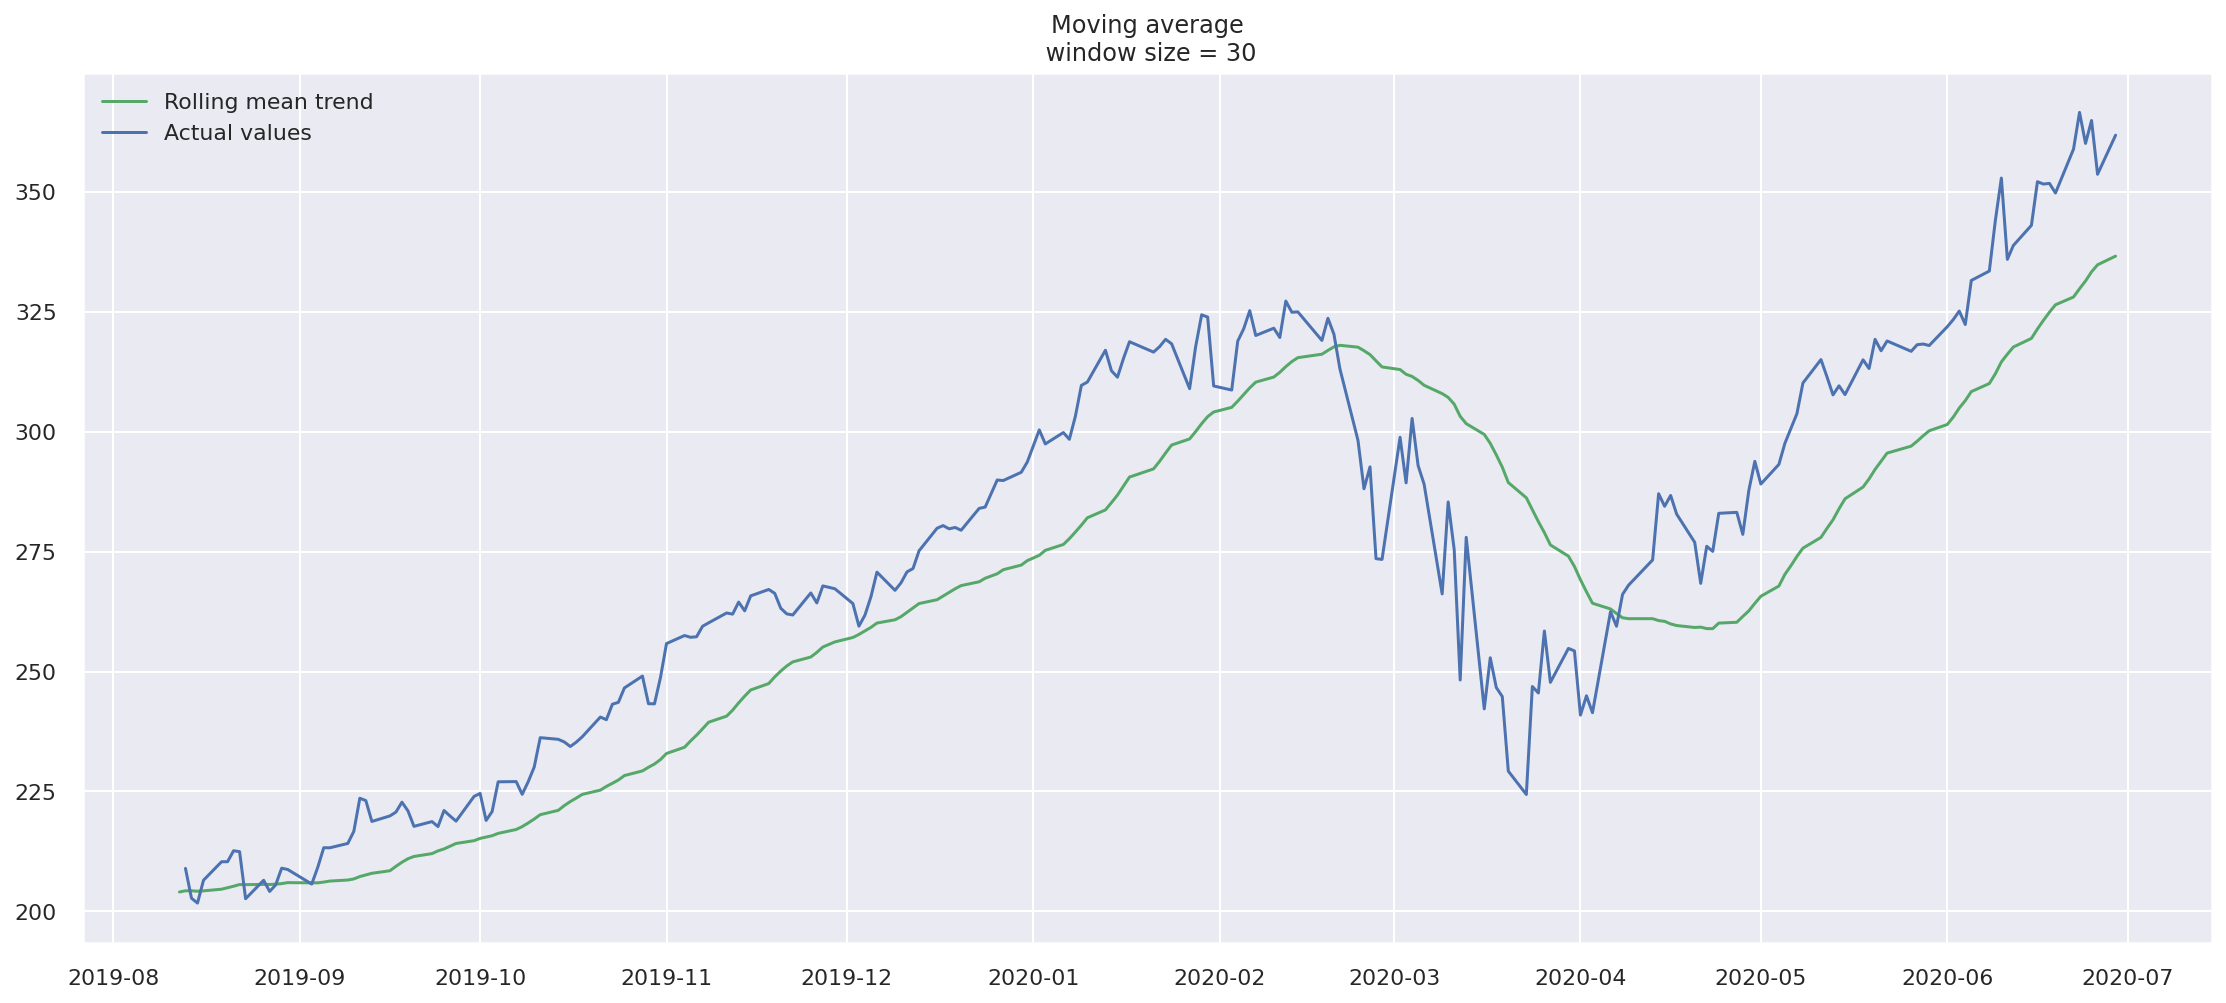

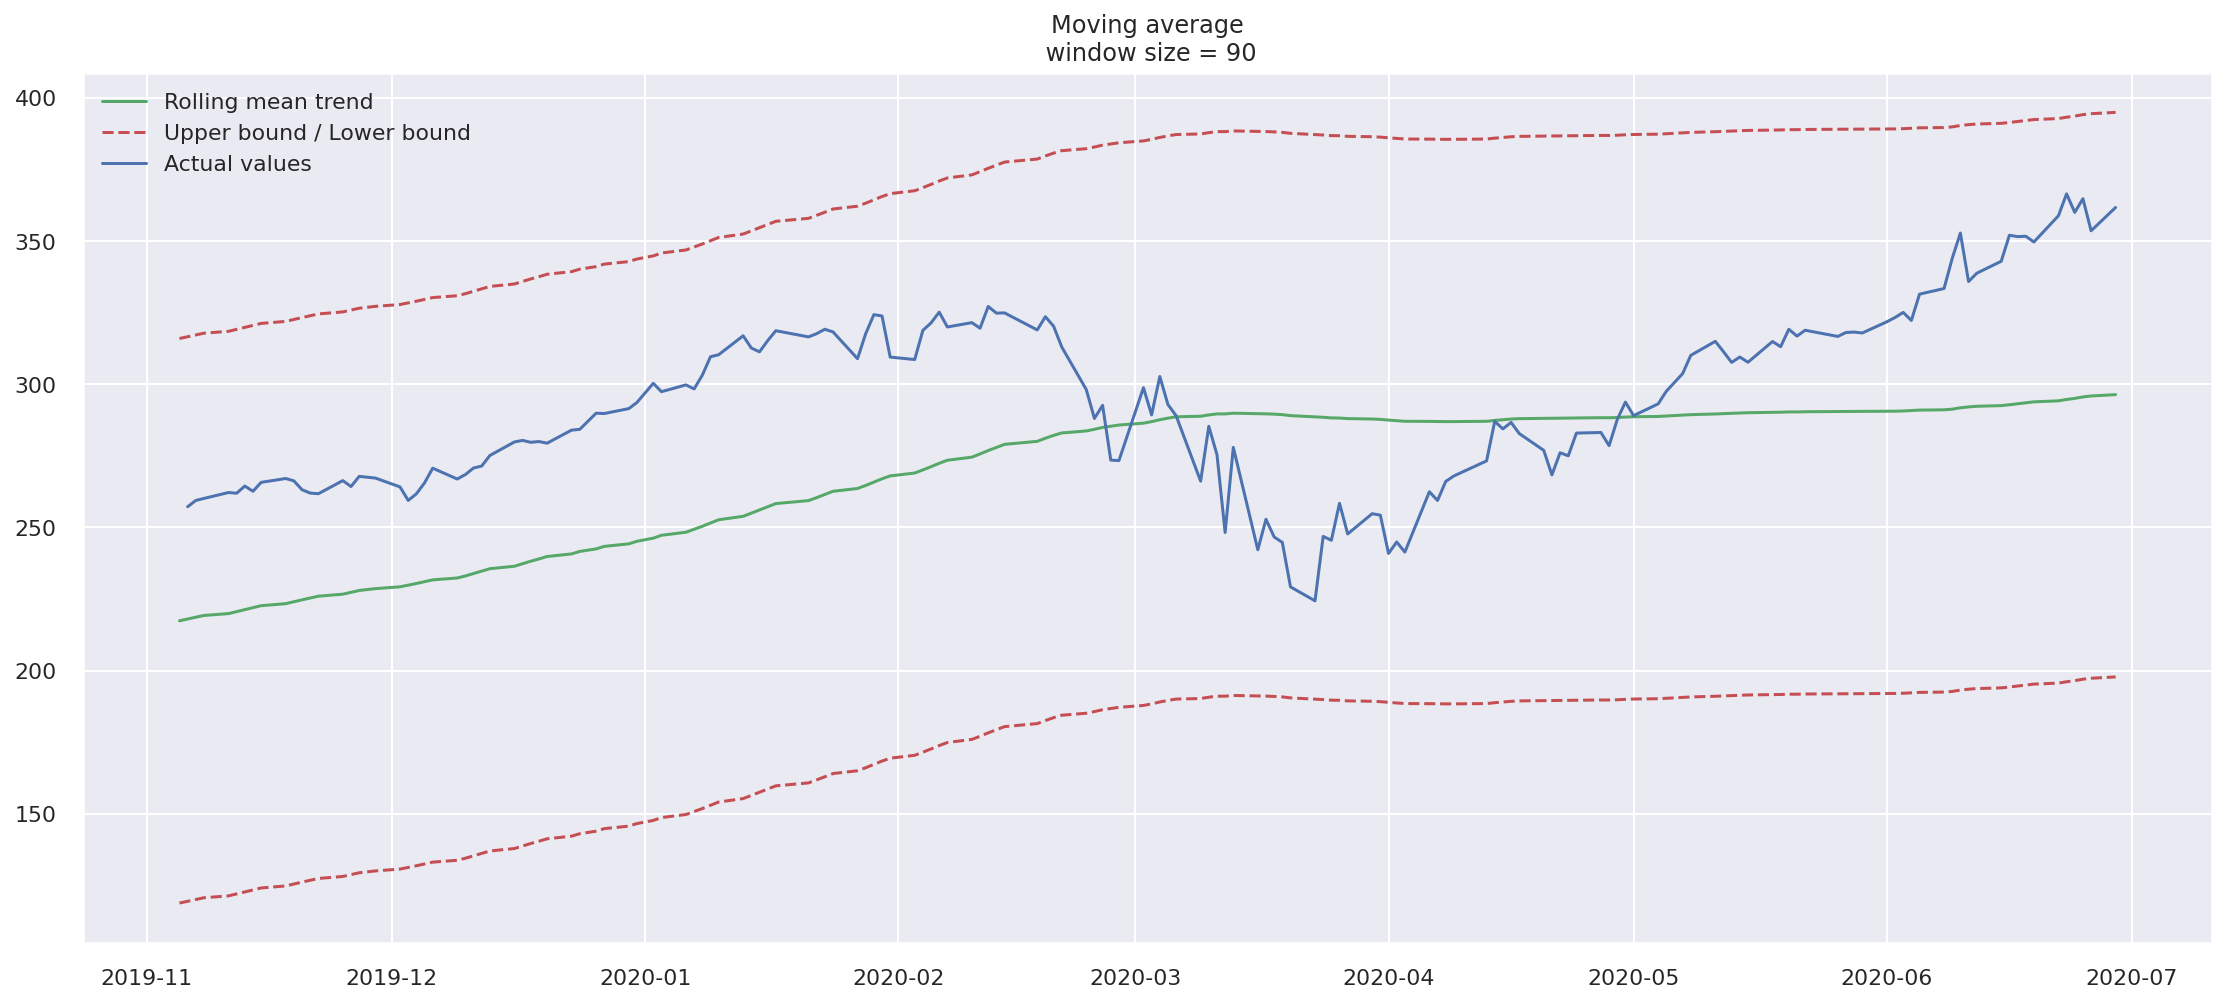

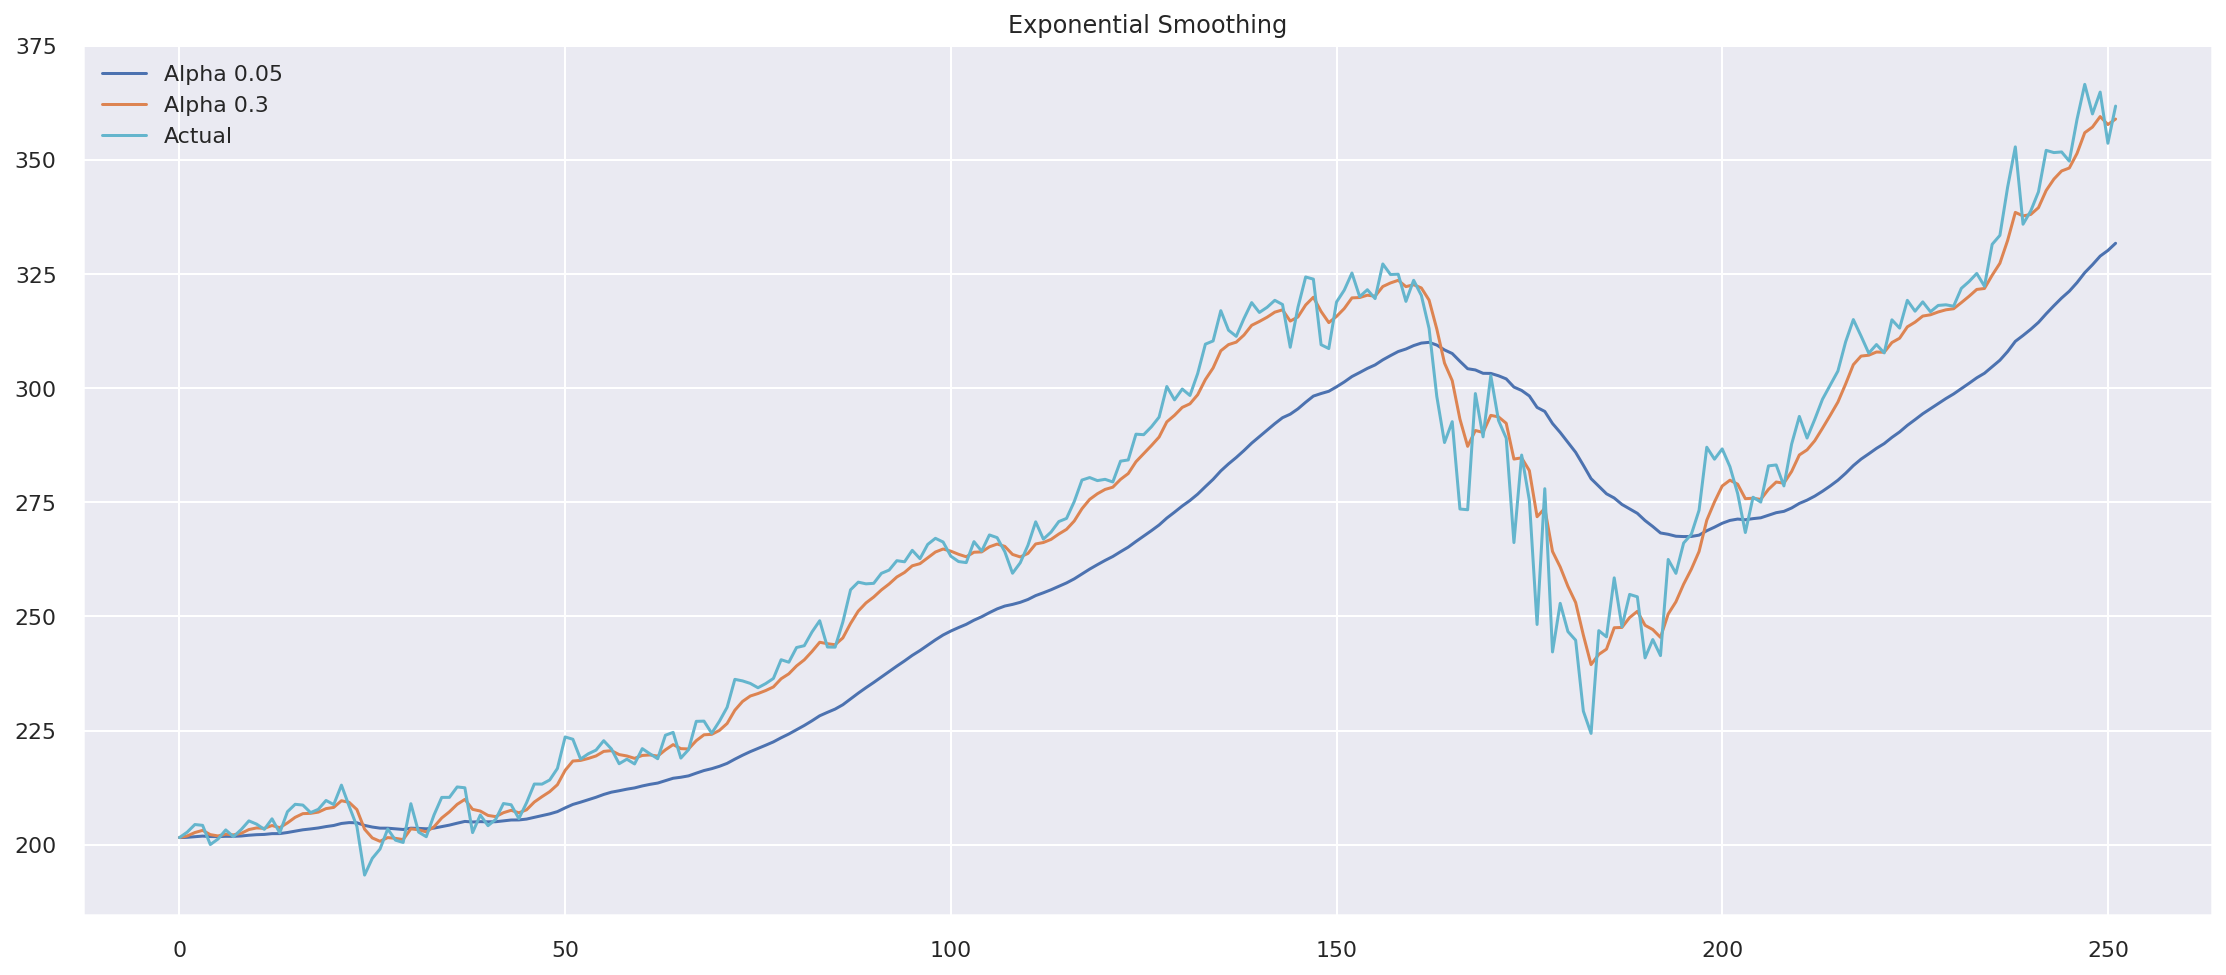

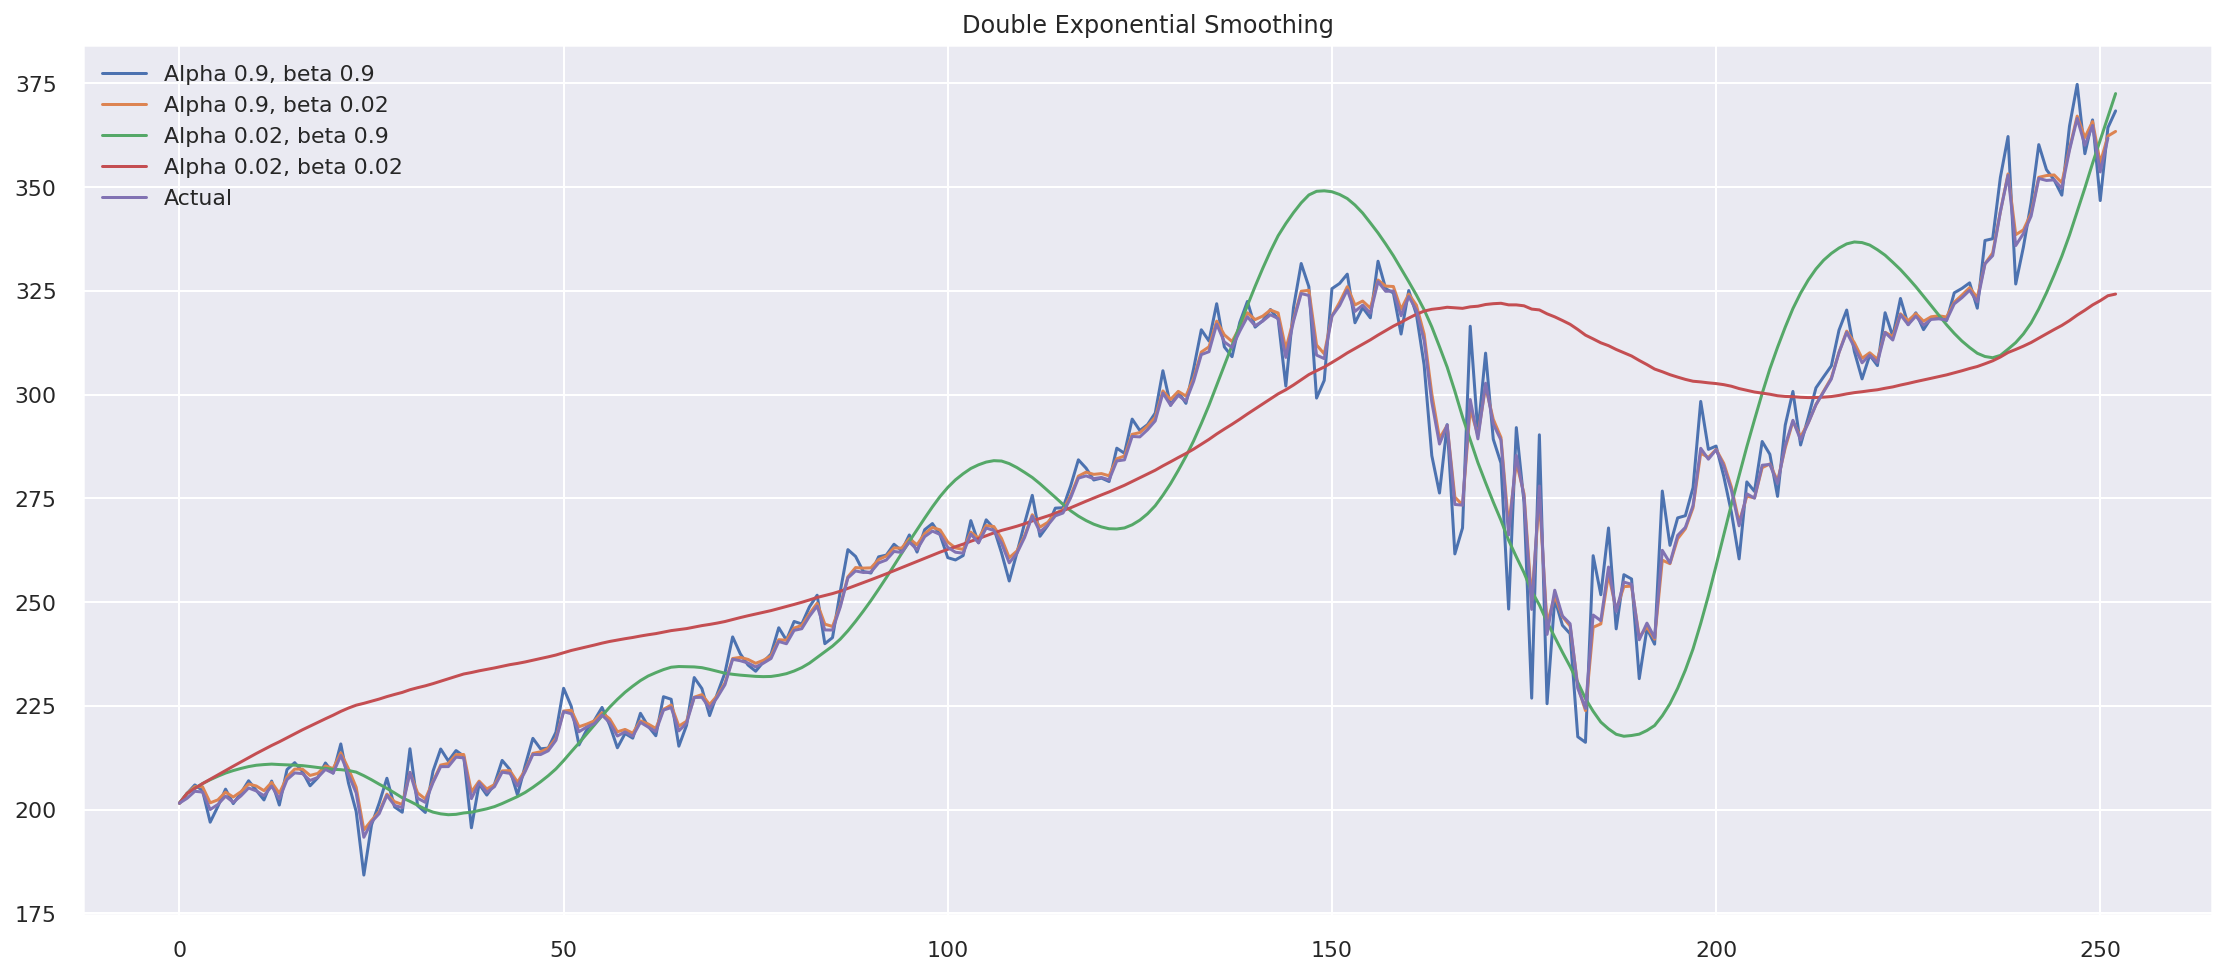

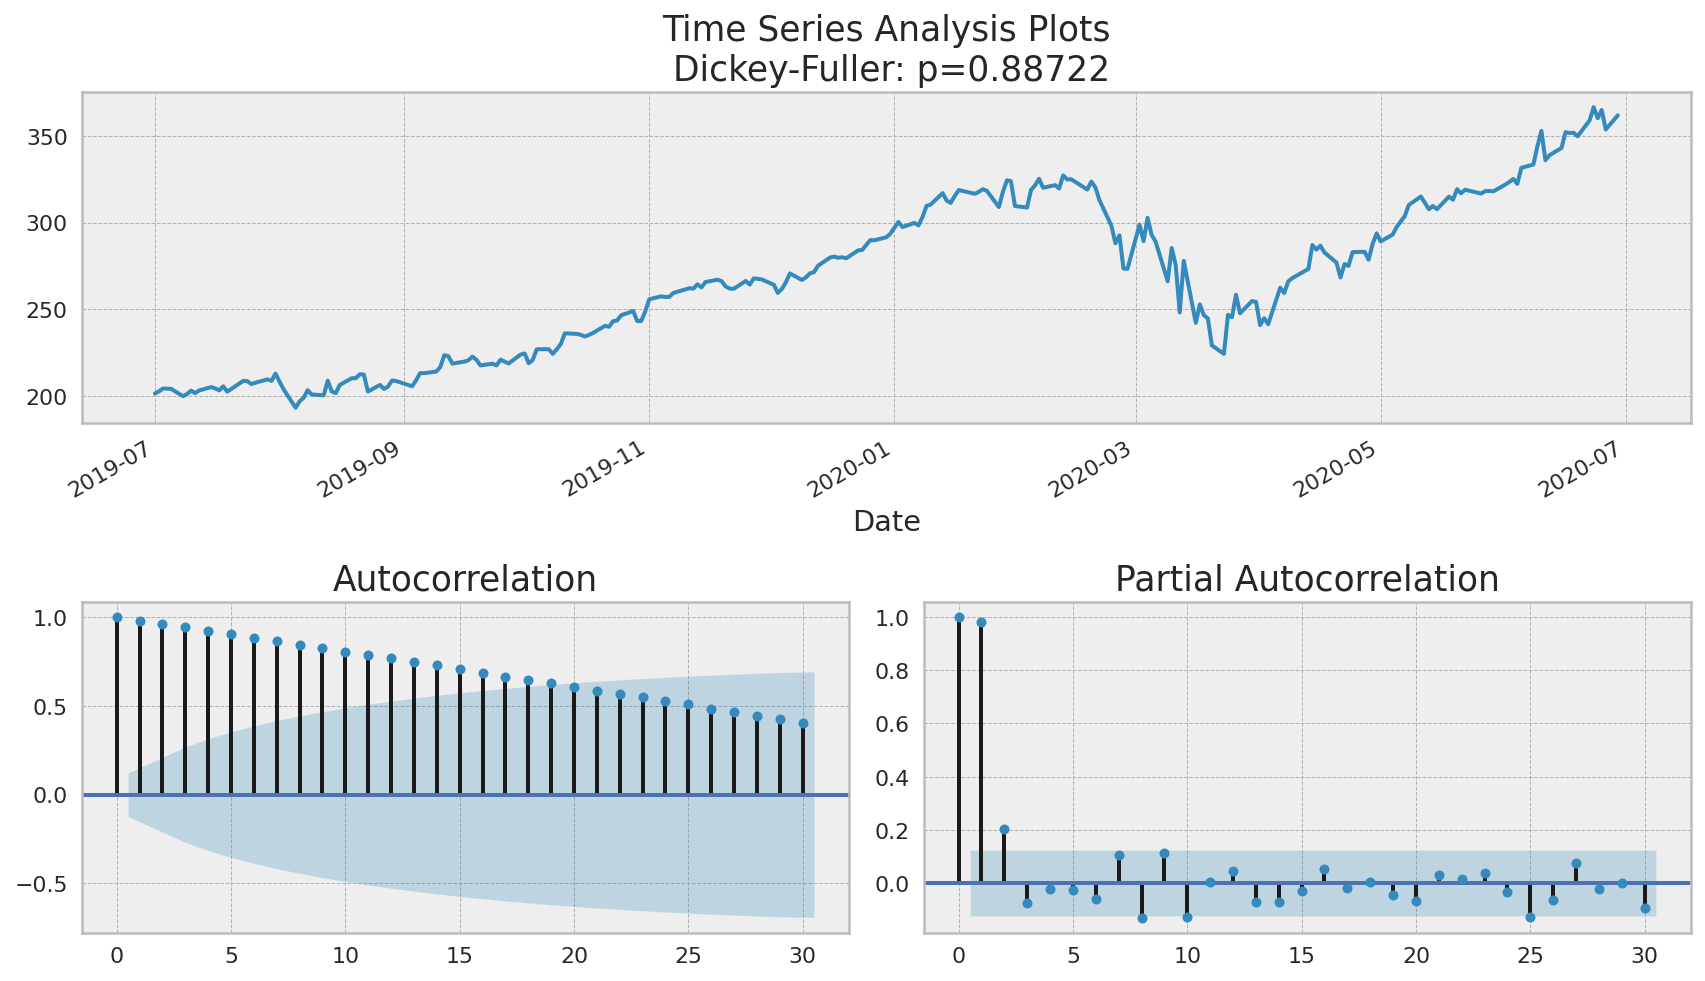

In [ ]:
### LIBRARY IMPORT
from datetime import datetime
from iexfinance.stocks import get_historical_data
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')

def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true))
    
### DATA PULL
start = datetime(2019, 6, 29)
end = datetime(2020, 6, 29)
tix = input('Ticker: ')
df = wb.DataReader(tix,'yahoo', start, end)
data=pd.DataFrame(df)

# drop_cols = ['ADJ_CLOSE', 'ADJ_LOW', 'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']
# data.drop(drop_cols, axis=1, inplace=True)

plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of '+tix)
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()


def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
    
#Smooth by the previous 5 days (by week)
plot_moving_average(data.Close, 5)

#Smooth by the previous month (30 days)
plot_moving_average(data.Close, 30)

#Smooth by previous quarter (90 days)    
plot_moving_average(data.Close, 90, plot_intervals=True)

# Exponential_smoothing
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

def plot_exponential_smoothing(series, alphas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
    
plot_exponential_smoothing(data.Close, [0.05, 0.3])


### double_exponential_smoothing:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result

def plot_double_exponential_smoothing(series, alphas, betas):
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])


### tsplot:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Close, lags=30)

data.tail()